Number of 0 values in each column: vote_average     7440
revenue         41997
budget          41198
dtype: int64
Number of missing values in each column: vote_average    0
revenue         0
budget          0
dtype: int64
       vote_average    vote_count       revenue        profit
count   5684.000000   5684.000000  5.684000e+03  5.684000e+03
mean       6.386064   1599.003519  6.759483e+07  4.244209e+07
std        0.880644   2954.293425  1.349459e+08  1.129812e+08
min        1.000000      1.000000  1.000000e+00 -1.110072e+08
25%        5.862750    145.000000  4.333726e+06 -1.568294e+06
50%        6.415500    534.000000  2.000000e+07  5.993782e+06
75%        6.989000   1655.250000  7.007593e+07  4.092741e+07
max       10.000000  34495.000000  2.923706e+09  2.686706e+09


d:\programs\dev\anaconda3\envs\ada\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


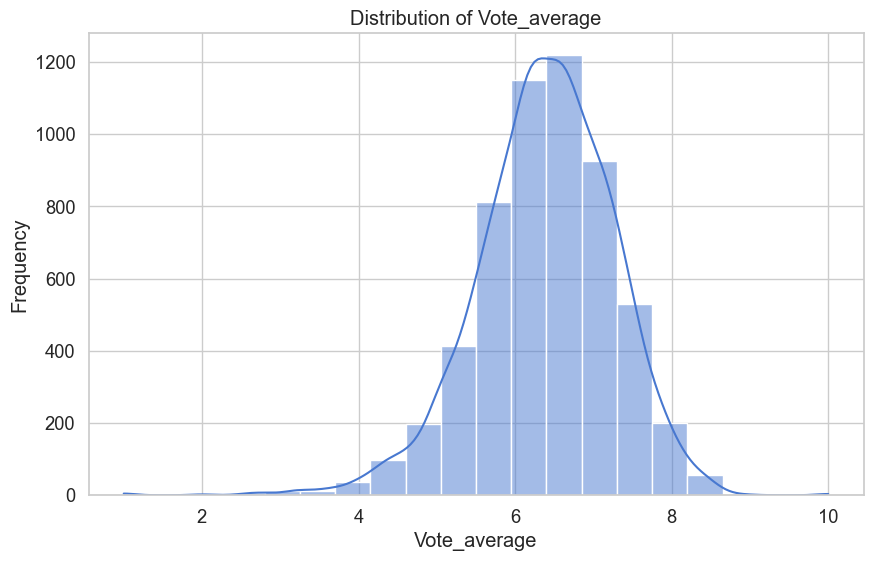

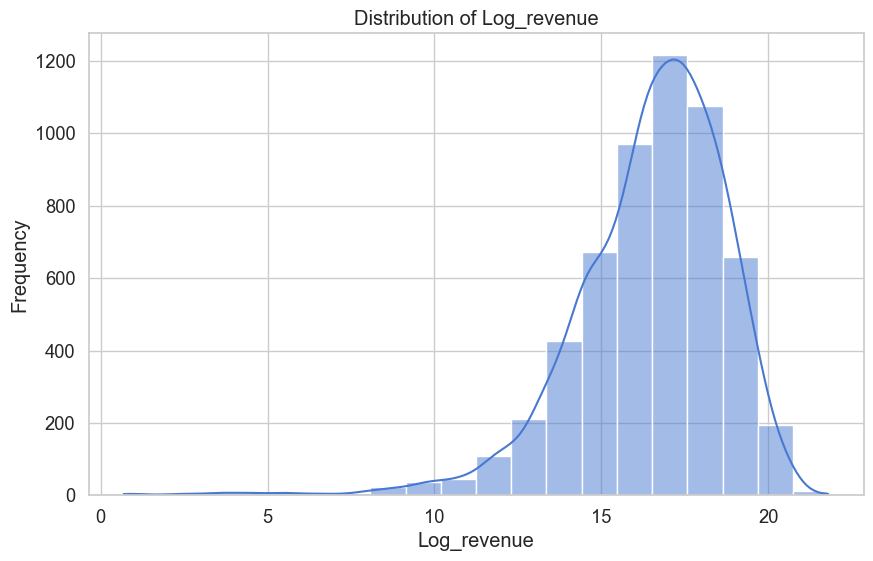

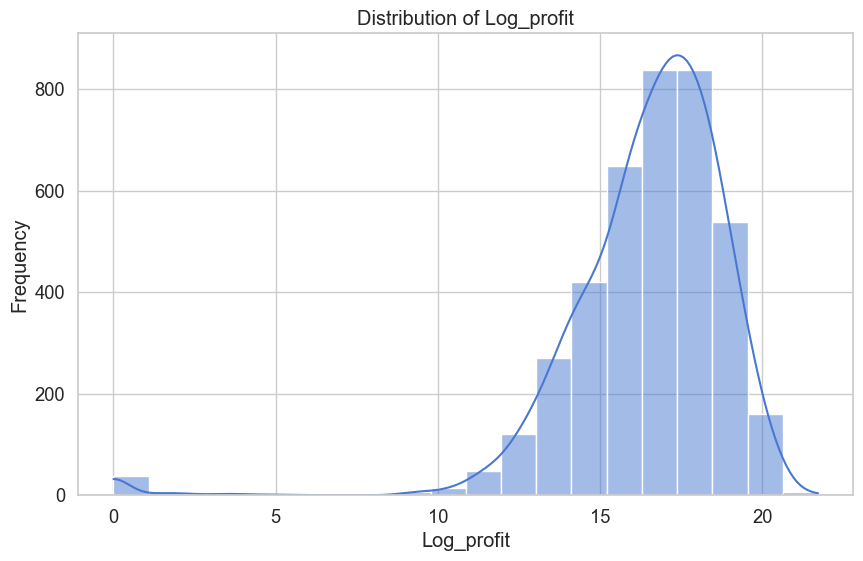

: 

: 

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import numpy as np

# Set visualization style
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

# 1. Initialize 

# Load the dataset
df = pd.read_csv('data/cmu_tmdb.csv')

# 2. Process the dataset

# Check 0 vote_average, revenue, and budget
print(f"Number of 0 values in each column: {(df[['vote_average', 'revenue', 'budget']] == 0).sum()}")
print(f"Number of missing values in each column: {df[['vote_average', 'revenue', 'budget']].isnull().sum()}")

# remove rows if one of vote_average, revenue, and budget is 0
df = df[(df[['vote_average', 'revenue', 'budget']] != 0).all(axis=1)]
df.reset_index(drop=True, inplace=True)

# Calculate profit
df['profit'] = df['revenue'] - df['budget']
# Calculate the ratio of revenue to budget
df['revenue_to_budget'] = df['revenue'] / df['budget']

# Logscale the revenue and profit columns
df['log_revenue'] = np.log1p(df['revenue'])
df['log_profit'] = np.log1p(df['profit'])
df['log_revenue_to_budget'] = np.log1p(df['revenue_to_budget'])

# Initial statistical summary
print(df[['vote_average', 'vote_count', 'revenue', 'profit']].describe())

# Distribution plots
variables = ['vote_average', 'log_revenue', 'log_profit', 'log_revenue_to_budget']
for var in variables:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[var], bins=20, kde=True)
    plt.title(f'Distribution of {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Frequency')
    plt.show()

# Scatter plot: Vote Average vs. Vote Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vote_count', y='vote_average', data=df)
plt.title('Vote Average vs. Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Vote Average')
plt.show()

# Scatter plot: Revenue vs. Budget
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title('Revenue vs. Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

# Scatter plot: Profit vs. Budget
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='profit', data=df)
plt.title('Profit vs. Budget')
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.show()

# Correlation matrix
corr_columns = ['vote_average', 'vote_count', 'revenue', 'budget', 'profit']
corr_matrix = df[corr_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Check for missing values
print("Missing values in each column:")
print(df[corr_columns].isnull().sum())

# Drop rows with missing values in the selected columns
df = df.dropna(subset=corr_columns)

# Remove outliers using the IQR method
Q1 = df[corr_columns].quantile(0.25)
Q3 = df[corr_columns].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[corr_columns] < (Q1 - 1.5 * IQR)) | (df[corr_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]